# Credit score classification

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np


#1. Análisis exploratorio


In [ ]:
train_data = pd.read_csv('/content/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### 📘 Descripción de variables del dataset `train`

1. **ID**: Identificador único de cada registro. No contiene nulos. Tipo `object`. No es útil para el modelo (ID).
2. **Customer_ID**: Identificador del cliente. No contiene nulos. Tipo `object`. No aporta al modelo (ID).
3. **Month**: Mes del registro. No contiene nulos. Tipo `object`. Podría convertirse en variable temporal (mes o trimestre).
4. **Name**: Nombre del cliente. Contiene nulos. Tipo `object`. No aporta al modelo (dato personal).
5. **Age**: Edad del cliente. No contiene nulos. Tipo `object`, aunque debería ser numérica.
6. **SSN**: Número de seguridad social. No contiene nulos. Tipo `object`. Dato confidencial, irrelevante para el modelo.
7. **Occupation**: Ocupación del cliente. No contiene nulos. Tipo `object`. Variable categórica útil.
8. **Annual_Income**: Ingreso anual. No contiene nulos. Tipo `object`, debería convertirse a numérica.
9. **Monthly_Inhand_Salary**: Salario mensual disponible. Contiene nulos. Tipo `float64`. Variable numérica útil.
10. **Num_Bank_Accounts**: Número de cuentas bancarias. No contiene nulos. Tipo `int64`. Variable numérica útil.
11. **Num_Credit_Card**: Número de tarjetas de crédito. No contiene nulos. Tipo `int64`. Variable numérica útil.
12. **Interest_Rate**: Tasa de interés aplicada. No contiene nulos. Tipo `int64`. Variable numérica útil.
13. **Num_of_Loan**: Número de préstamos activos. No contiene nulos. Tipo `object`, debería ser numérica.
14. **Type_of_Loan**: Tipo(s) de préstamo(s). Contiene nulos. Tipo `object`. Categórica compleja (posibles múltiples valores).
15. **Delay_from_due_date**: Días de retraso promedio en pagos. No contiene nulos. Tipo `int64`. Variable numérica útil.
16. **Num_of_Delayed_Payment**: Número de pagos retrasados. Contiene nulos. Tipo `object`, debería ser numérica.
17. **Changed_Credit_Limit**: Variación del límite de crédito. No contiene nulos. Tipo `object`, debería ser numérica.
18. **Num_Credit_Inquiries**: Número de consultas de crédito. Contiene nulos. Tipo `float64`. Variable numérica útil.
19. **Credit_Mix**: Combinación de tipos de crédito (Good, Bad, etc.). No contiene nulos. Tipo `object`. Variable categórica útil.
20. **Outstanding_Debt**: Deuda pendiente. No contiene nulos. Tipo `object`, debería ser numérica.
21. **Credit_Utilization_Ratio**: Ratio de utilización de crédito. No contiene nulos. Tipo `float64`. Variable numérica útil.
22. **Credit_History_Age**: Antigüedad del historial crediticio. Contiene nulos. Tipo `object`, formato complejo (ej. “22 Years and 4 Months”).
23. **Payment_of_Min_Amount**: Indicador de si paga el monto mínimo. No contiene nulos. Tipo `object`. Categórica útil.
24. **Total_EMI_per_month**: Suma de pagos mensuales (EMIs). No contiene nulos. Tipo `float64`. Variable numérica útil.
25. **Amount_invested_monthly**: Monto invertido mensualmente. Contiene nulos. Tipo `object`, debería ser numérica.
26. **Payment_Behaviour**: Comportamiento de pago (formato compuesto). No contiene nulos. Tipo `object`. Categórica a transformar.
27. **Monthly_Balance**: Balance mensual promedio. Contiene nulos. Tipo `object`, debería ser numérica.
28. **Credit_Score**: Variable objetivo (categoría del score crediticio). No contiene nulos. Tipo `object`. Variable de clasificación (target).

In [ ]:
train_data.shape

(100000, 28)

In [ ]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,"95,061.00","93,020.00","100,000.00","100,000.00","100,000.00","100,000.00","95,215.00","100,000.00","90,254.00","97,909.00","98,035.00","98,991.00","100,000.00","100,000.00","91,216.00","98,791.00"
mean,110.93,"178,578.96","4,194.17",17.09,22.47,72.47,2.78,21.07,31.03,10.39,27.75,"1,426.50",32.29,"1,403.12",195.54,402.55
std,689.41,"1,442,878.39","2,935.18",117.40,129.06,466.42,62.50,14.86,226.96,6.79,193.18,"1,155.05",5.12,"8,306.04",199.56,213.93
min,-500.00,"7,005.93",303.65,-1.00,0.00,1.00,-100.00,-5.00,-3.00,-6.49,0.00,0.23,20.00,0.00,0.00,0.01
25%,24.00,"19,435.60","1,792.08",3.00,4.00,8.00,1.00,10.00,9.00,5.32,3.00,566.08,28.05,30.31,72.24,270.11
50%,33.00,"37,550.74","3,852.74",6.00,5.00,13.00,3.00,18.00,14.00,9.40,6.00,"1,166.37",32.31,69.25,128.95,336.73
75%,42.00,"72,843.38","5,371.53",7.00,7.00,20.00,5.00,28.00,18.00,14.87,9.00,"1,948.20",36.50,161.22,236.82,470.26
max,"8,698.00","24,198,062.00","15,204.63","1,798.00","1,499.00","5,797.00","1,496.00",67.00,"4,397.00",36.97,"2,597.00","4,998.07",50.00,"82,331.00","1,977.33","1,602.04"


# Análisis de la variable objetivo: Credit Score

El data set para entrenar el modelo presenta 100,000 filas y 28 variables

In [ ]:
train_data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

Primero converitmos los textos a números

In [ ]:
train_data['Credit_Score_Binary'] = train_data['Credit_Score'].map({
    'Poor': 0,     # Default
    'Standard': 1, # No default
    'Good': 1      # No default
})

In [ ]:
(train_data['Credit_Score_Binary'].value_counts(normalize=True) * 100).round(2)

,proportion
Credit_Score_Binary,
1,71.0
0,29.0


/tmp/ipython-input-13-3276240033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score_Binary', data=train_data, palette='Set2')


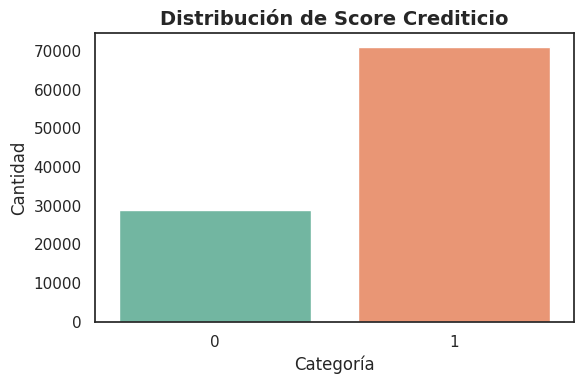

In [ ]:
sns.set(style="white")

plt.figure(figsize=(6, 4))

sns.countplot(x='Credit_Score_Binary', data=train_data, palette='Set2')

plt.title('Distribución de Score Crediticio', fontsize=14, weight='bold')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Distribución de la variable objetivo: `Credit_Score`

La variable `Credit_Score` clasifica a los clientes en tres categorías:

- **Standard (1)**: 53.17%  
- **Poor (0)**: 29.00%  
- **Good (2)**: 17.83%

Esto indica que más de la mitad de los clientes tienen un perfil crediticio estándar. Solo una minoría (18%) presenta un score "Good", mientras que cerca del 30% está en la categoría "Poor".

Este desbalance debe tenerse en cuenta al construir el modelo, ya que podría sesgar los resultados si no se aplican técnicas de balanceo o ajustes de ponderación.

In [ ]:
# Conversión segura de variables numéricas originalmente en formato object

train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
train_data['Annual_Income'] = pd.to_numeric(train_data['Annual_Income'], errors='coerce')
train_data['Num_of_Loan'] = pd.to_numeric(train_data['Num_of_Loan'], errors='coerce')
train_data['Num_of_Delayed_Payment'] = pd.to_numeric(train_data['Num_of_Delayed_Payment'], errors='coerce')
train_data['Changed_Credit_Limit'] = pd.to_numeric(train_data['Changed_Credit_Limit'], errors='coerce')
train_data['Outstanding_Debt'] = pd.to_numeric(train_data['Outstanding_Debt'], errors='coerce')
train_data['Amount_invested_monthly'] = pd.to_numeric(train_data['Amount_invested_monthly'], errors='coerce')
train_data['Monthly_Balance'] = pd.to_numeric(train_data['Monthly_Balance'], errors='coerce')

In [ ]:
na_ratio = ((train_data.isnull().sum() / len(train_data)) * 100)
na_ratio.sort_values(ascending=False)


,0
Monthly_Inhand_Salary,15.00
Type_of_Loan,11.41
Name,9.98
Num_of_Delayed_Payment,9.75
Credit_History_Age,9.03
Amount_invested_monthly,8.78
Annual_Income,6.98
Age,4.94
Num_of_Loan,4.78
Changed_Credit_Limit,2.09


### Imputación de valores nulos en variables numéricas

Se identificaron varias variables numéricas con valores faltantes, algunas de ellas con proporciones superiores al 5%, como `Monthly_Inhand_Salary` (15%) y `Num_of_Delayed_Payment` (9.75%). En estos casos, se optó por imputar los valores faltantes utilizando la **mediana**, debido a que muchas de estas variables presentan **distribuciones asimétricas y presencia de outliers**, lo que hace que la mediana sea una medida de tendencia central más robusta que la media.

Este enfoque permite:
- Preservar la mayor cantidad posible de registros.
- Evitar sesgos que podrían generarse al imputar con la media en distribuciones sesgadas.
- Mantener la integridad del dataset para análisis posteriores y modelado.

**Referencias:**
- Joel, L. O., Doorsamy, W., & Paul, B. S. (2022). *A Review of Missing Data Handling Techniques for Machine Learning*. Procedia Computer Science, 200, 262–269. [DOI: 10.1016/j.procs.2022.01.294](https://doi.org/10.1016/j.procs.2022.01.294)
- An introduccion to Statiscal Learning

In [ ]:
med_salary = train_data['Monthly_Inhand_Salary'].median()
med_annual_income = train_data['Annual_Income'].median()
med_age = train_data['Age'].median()
med_num_loan = train_data['Num_of_Loan'].median()
med_delayed_payment = train_data['Num_of_Delayed_Payment'].median()
med_credit_limit = train_data['Changed_Credit_Limit'].median()
med_credit_inquiries = train_data['Num_Credit_Inquiries'].median()
med_outstanding_debt = train_data['Outstanding_Debt'].median()
med_invested_monthly = train_data['Amount_invested_monthly'].median()
med_monthly_balance = train_data['Monthly_Balance'].median()

train_data['Monthly_Inhand_Salary'] = train_data['Monthly_Inhand_Salary'].fillna(med_salary)
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(med_annual_income)
train_data['Age'] = train_data['Age'].fillna(med_age)
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].fillna(med_num_loan)
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].fillna(med_delayed_payment)
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].fillna(med_credit_limit)
train_data['Num_Credit_Inquiries'] = train_data['Num_Credit_Inquiries'].fillna(med_credit_inquiries)
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].fillna(med_outstanding_debt)
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].fillna(med_invested_monthly)
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].fillna(med_monthly_balance)

Nos fijamos que la variable 'Type of Loan' contiene distintos tipos de deudas en una sola celda

In [ ]:
train_data['Type_of_Loan'].value_counts(dropna=False).head(20)

,count
Type_of_Loan,
NaN,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152


 Verificamos el total de tipos de deuda

In [ ]:
# Limpieza para poder contar correctamente
train_data['Type_of_Loan_clean'] = train_data['Type_of_Loan'].dropna().apply(
    lambda x: [i.strip().lower() for i in x.replace('and', '').split(',')]
)

# Aplanamos la lista y contamos valores únicos
from collections import Counter

all_loans = train_data['Type_of_Loan_clean'].dropna().tolist()
flat_loans = [loan for sublist in all_loans for loan in sublist if loan]

loan_counter = Counter(flat_loans)

print("Número de tipos de préstamos únicos:", len(loan_counter))
print("Tipos de préstamo:", list(loan_counter.keys()))

Número de tipos de préstamos únicos: 9
Tipos de préstamo: ['auto loan', 'credit-builder loan', 'personal loan', 'home equity loan', 'not specified', 'mortgage loan', 'student loan', 'debt consolidation loan', 'payday loan']


Creamos columnas por cada tipo de deuda que se basarán en 'Type of Loan', siendo 1 en caso de contenga ese tipo de préstamos y 0 si no

In [ ]:
# Creamos las columnas dummy
for loan_type in loan_counter:
    col_name = f'{loan_type.replace(" ", "_")}'
    train_data[col_name] = train_data['Type_of_Loan'].apply(
        lambda x: 1 if pd.notna(x) and loan_type in x.lower() else 0
    )

In [ ]:
for col in ['auto_loan', 'credit-builder_loan', 'personal_loan',
            'home_equity_loan', 'not_specified', 'mortgage_loan',
            'student_loan', 'debt_consolidation_loan', 'payday_loan']:
    print(f"{col}:\n", train_data[col].value_counts(dropna=False), '\n')

auto_loan:
 auto_loan
0    69440
1    30560
Name: count, dtype: int64 

credit-builder_loan:
 credit-builder_loan
0    68272
1    31728
Name: count, dtype: int64 

personal_loan:
 personal_loan
0    68896
1    31104
Name: count, dtype: int64 

home_equity_loan:
 home_equity_loan
0    68600
1    31400
Name: count, dtype: int64 

not_specified:
 not_specified
0    68320
1    31680
Name: count, dtype: int64 

mortgage_loan:
 mortgage_loan
0    68640
1    31360
Name: count, dtype: int64 

student_loan:
 student_loan
0    68960
1    31040
Name: count, dtype: int64 

debt_consolidation_loan:
 debt_consolidation_loan
0    68960
1    31040
Name: count, dtype: int64 

payday_loan:
 payday_loan
0    68056
1    31944
Name: count, dtype: int64 



La columna `Type_of_Loan` contenía combinaciones textuales de múltiples tipos de préstamos en una misma celda. Para hacerla útil en modelos de clasificación, se transformó esta variable en múltiples columnas dummy (una por tipo de préstamo), codificando 1 si el tipo de préstamo aparece en el registro del cliente y 0 en caso contrario.

Este enfoque permite al modelo identificar de forma individual la presencia o ausencia de productos financieros específicos por cliente, lo cual puede ser indicativo de mayor o menor riesgo crediticio.

Los valores faltantes en `Type_of_Loan` fueron tratados como ausencia de préstamos, codificándose con 0 en todas las columnas dummy. En el análisis posterior se evaluará si esta decisión introduce sesgo o si se requiere un tratamiento adicional para diferenciar entre "sin préstamo" y "sin información".

In [ ]:
train_data['Credit_History_Age'].dropna().unique()[:20]

array(['22 Years and 1 Months', '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months'], dtype=object)

In [ ]:
def parse_credit_history_age(val):
    if pd.isna(val):
        return np.nan
    try:
        parts = val.split('and')
        years = int(parts[0].strip().split(' ')[0])
        months = int(parts[1].strip().split(' ')[0])
        return years * 12 + months
    except:
        return np.nan

train_data['Credit_History_Age_Months'] = train_data['Credit_History_Age'].apply(parse_credit_history_age)

In [ ]:
train_data['Credit_History_Age_Months'].head()

,Credit_History_Age_Months
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0


Una vez que converitmos la variable de creidt history age a meses procedemos a inputar los valores nulos con la mediana

In [ ]:
med_cred_age = train_data['Credit_History_Age_Months'].median()
train_data['Credit_History_Age_Months'] = train_data['Credit_History_Age_Months'].fillna(med_cred_age)

# 2. Analisis Univariado
## 2.1. Analisis de variables numericas

In [ ]:
def univariate_analysis(df, variables):
    results = []

    for var in variables:
        variable = df[var]
        mean = variable.mean()
        median = variable.median()
        std = variable.std()
        stats = {
            'Variable': var,
            'Mean': round(mean, 3),
            'Median': round(median, 3),
            'Sd': round(std, 3),
            'CV (mean)': round(std / mean, 3) if mean != 0 else np.nan,
            'CV (median)': round(std / median, 3) if median != 0 else np.nan,
            'Skewness': round(ss.skew(variable), 3),
            'Kurtosis': round(ss.kurtosis(variable), 3),
            'Min': round(variable.min(), 3),
            'Max': round(variable.max(), 3),
            'Range': round(variable.max() - variable.min(), 3)
        }
        results.append(stats)

    return pd.DataFrame(results)

In [ ]:
numericas_convertidas = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age_Months'
]
# Aplicar la función y guardar los resultados
summary_univariado = univariate_analysis(train_data, numericas_convertidas)
pd.options.display.float_format = '{:,.2f}'.format
# Ver resultados
summary_univariado



,Variable,Mean,Median,Sd,CV (mean),CV (median),Skewness,Kurtosis,Min,Max,Range
0,Age,107.08,33.00,672.38,6.28,20.38,9.42,93.48,-500.00,"8,698.00","9,198.00"
1,Annual_Income,"168,735.19","37,550.74","1,392,074.52",8.25,37.07,12.88,174.22,"7,005.93","24,198,062.00","24,191,056.07"
2,Monthly_Inhand_Salary,"4,029.09","3,093.74","2,961.36",0.73,0.96,1.35,1.39,303.64,"15,204.63","14,900.99"
3,Num_Bank_Accounts,17.09,6.00,117.41,6.87,19.57,11.20,132.50,-1.00,"1,798.00","1,799.00"
4,Num_Credit_Card,22.47,5.00,129.06,5.74,25.81,8.46,74.54,0.00,"1,499.00","1,499.00"
5,Interest_Rate,72.47,13.00,466.42,6.44,35.88,9.01,85.18,1.00,"5,797.00","5,796.00"
6,Num_of_Loan,2.79,3.00,60.99,21.85,20.33,16.28,322.87,-100.00,"1,496.00","1,596.00"
7,Delay_from_due_date,21.07,18.00,14.86,0.70,0.83,0.97,0.35,-5.00,67.00,72.00
8,Num_of_Delayed_Payment,29.37,14.00,215.67,7.34,15.40,15.04,239.89,-3.00,"4,397.00","4,400.00"
9,Changed_Credit_Limit,10.37,9.40,6.72,0.65,0.71,0.65,0.17,-6.49,36.97,43.46


1. Corregimos valores extraños en "Age" que son menores a 0 o mayores a 100

In [ ]:
# Ver los valores mínimos y máximos de age
print("Valores menores a 0:")
print(train_data[train_data['Age'] < 0]['Age'].value_counts())

print("\nValores mayores a 100:")
print(train_data[train_data['Age'] > 100]['Age'].value_counts())


Valores menores a 0:
Age
-500.00    886
Name: count, dtype: int64

Valores mayores a 100:
Age
3,439.00    3
4,494.00    3
8,015.00    3
4,083.00    3
1,692.00    3
           ..
7,481.00    1
2,855.00    1
5,973.00    1
7,462.00    1
5,602.00    1
Name: count, Length: 1614, dtype: int64


In [ ]:
# Reemplazar valores inválidos por NaN
train_data.loc[(train_data['Age'] < 0) | (train_data['Age'] > 100), 'Age'] = np.nan

# Imputar con la mediana
med_age = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(med_age)

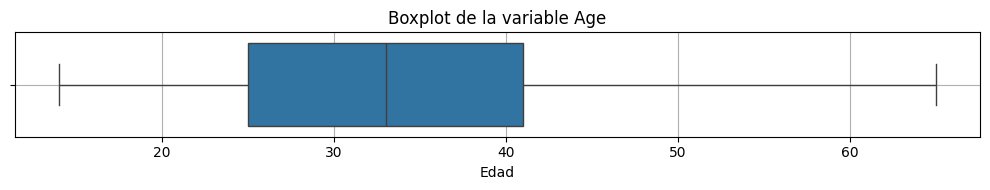

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=train_data['Age'])
plt.title('Boxplot de la variable Age')
plt.xlabel('Edad')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
q1 = train_data['Age'].quantile(0.25)
q3 = train_data['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Winsorizamos
train_data['Age'] = train_data['Age'].clip(lower=lower_bound, upper=upper_bound)